<a href="https://www.kaggle.com/code/deephika/world-development-indicator-visualisation?scriptVersionId=247388460" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## WORLD DEVELOPEMENT INDIACTOR
#### DATA VISUALISATION USING MATPLOT LIBRARY AND GEOPANDAS

<a id = "table-of-content"></a>
## Table of Content

1. [Imports](#intro)
2. [Data cleaning](#datacleaning)
3. [Visualisation](#Visualisation)
   * [GDP across all countries](#GDP)
   * [CO2 emission](#CO2_emission)
   * [CO2 emission comparisson across countries](#CO2_compare)
   * [Imports and Exports](#Imp_Exp)       
   * [Consumer Price Index](#CPI)


In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-development-indicators/information-about-wdi-revisions-excel-912-kb-.xls
/kaggle/input/world-development-indicators/wdi-excel-zip-59-mb-/WDIEXCEL.xlsx
/kaggle/input/world-development-indicators/wdi-csv-zip-57-mb-/WDISeries.csv
/kaggle/input/world-development-indicators/wdi-csv-zip-57-mb-/WDICountry-Series.csv
/kaggle/input/world-development-indicators/wdi-csv-zip-57-mb-/WDICountry.csv
/kaggle/input/world-development-indicators/wdi-csv-zip-57-mb-/WDIFootNote.csv
/kaggle/input/world-development-indicators/wdi-csv-zip-57-mb-/WDIData.csv
/kaggle/input/world-development-indicators/wdi-csv-zip-57-mb-/WDISeries-Time.csv


In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ipywidgets import interact,widgets
import geopandas as gpd

plt.style.use("dark_background")

<a id = "imports"></a>
### ***1. Importing the data***

In [4]:
wdi = pd.read_csv("/kaggle/input/world-development-indicators/wdi-csv-zip-57-mb-/WDIData.csv")
wdi.shape

(422136, 64)

In [5]:
#Changing the columns as row values
wdi_data = pd.melt(wdi,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],var_name="Year",value_name="Value")
wdi_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,1960,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,1960,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


<a id = "Datacleaning"></a>
### ***2. Data cleaning & transformation***

In [6]:
#Number of years in the data
print(len(wdi_data["Year"].unique().tolist()))
print(wdi_data["Year"].min())
print(wdi_data["Year"].max())

60
1960
Unnamed: 63


In [7]:
#Removing unnamed year from the data
unnamed_year = wdi_data["Year"] == "Unnamed: 63"
wdi_data = wdi_data[~unnamed_year]

##### *There is 60 years of data : from 1960 to 2018*

In [8]:
#changing the Year format to integer
wdi_data = wdi_data.astype({"Year":"int32"})

In [9]:
# unique countries in the data 
print(len(wdi_data["Country Name"].unique().tolist()))
print(len(wdi_data["Country Code"].unique().tolist()))

264
264


##### *There are 264 unique countries in the dataset*

<a id = "Visualisation"></a>
### ***3.Visualisation***

<a id = "GDP"></a>
####  1. **Life expectancy and GDP**

In [10]:
gdp = pd.DataFrame(
    wdi_data[(wdi_data["Indicator Name"].str.contains(r"GDP per capita \(constant 20")) & (wdi_data["Year"] == 2017)])

population = pd.DataFrame(
    wdi_data[(wdi_data["Indicator Name"].str.contains(r"Population, total")) & (wdi_data["Year"] == 2017)])

life_exp = pd.DataFrame(
    wdi_data[(wdi_data["Indicator Name"]=="Life expectancy at birth, total (years)") & (wdi_data["Year"] == 2017)])

In [11]:
gdp = gdp[~gdp["Value"].isnull()]
population = population[~population["Value"].isnull()]
life_exp = life_exp[~life_exp["Value"].isnull()]

In [12]:
data1 = pd.merge(gdp.loc[:,["Country Name","Country Code", "Year", "Value"]], life_exp.loc[:,["Country Name","Value"]], on="Country Name", how = "inner")
data1 = pd.merge(data1, population.loc[:,["Country Name","Value"]], on="Country Name", how = "inner")

data1.columns = ["Country_name","Country_code", "Year", "GDP","Life_exp","Population"]

In [13]:
# zoomin in on specific countries below
country_codes = ["USA","CAN", "GBR", "JPN", "SGP","RUS", "IND", "CHN"]

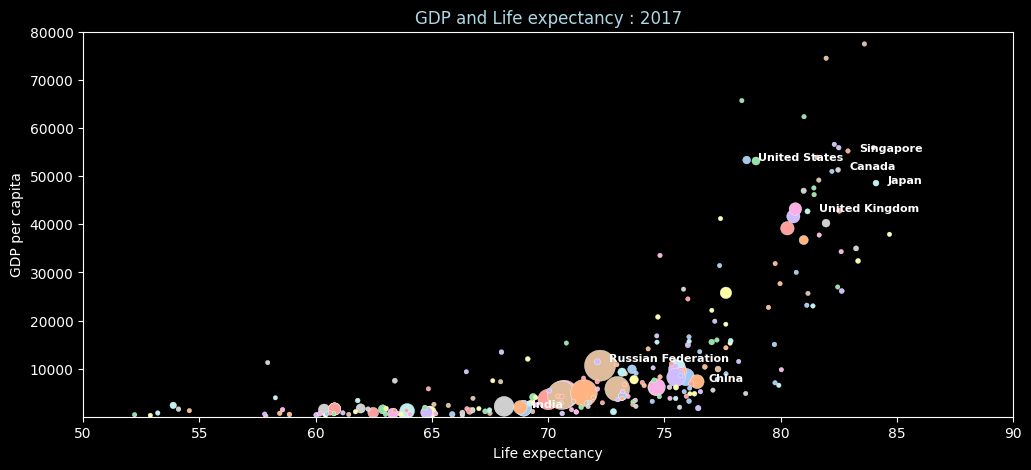

In [14]:
plt.figure(figsize=(12,5))
sns.scatterplot(
    data = data1,
    x = data1.Life_exp,
    y = data1.GDP,
    size = data1.Population/100000,
    hue = data1.Country_name,
    legend = False,
    sizes = (10,500),
    palette = "pastel"
    )

for _, row in data1[data1["Country_code"].isin(country_codes)].iterrows():
    plt.text(row["Life_exp"]+0.5,row["GDP"]+0.5,row["Country_name"], fontsize=8, color= "white",weight="bold")

plt.style.use("dark_background")
plt.xlabel("Life expectancy")
plt.ylabel("GDP per capita")
plt.title("GDP and Life expectancy : 2017", color ="lightblue")

plt.xlim(50,90)
plt.ylim(50,80000)
plt.show()

#####  **Inference**

 ##### <span style = "color:blue">* There seems a minor positive linear relationship between life expectancy and GDP. Countries with higher life expectancy have higher GDP per capita. </span>
 ##### <span style = "color:blue">* Note: India, Russia and China have life expectancy below 75, and GDP well below 20,000 and US,UK,Japan,Singapore,Canada are some countries that have life expectancy above 75 and GDP above 40,000  </span>

<a id = "CO2_emission"></a>
#### 2.   **CO2 emission**

In [15]:
#Filtering the data for country "USA" and indicator "CO2 emission" 
filter1 = wdi_data["Country Code"].isin(["USA","CAN","GBR","JPN","SGP","RUS","IND","CHN"])
filter2 = wdi_data["Indicator Name"] == "CO2 emissions (metric tons per capita)"

data2 = pd.DataFrame(wdi_data[filter1 & filter2])

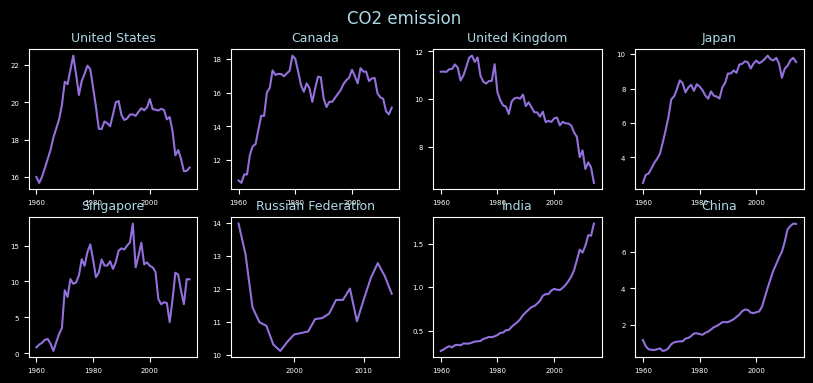

In [16]:
col = 1
fig,axs = plt.subplots(2,4,figsize=(10,4))

for country in country_codes:
    df = data2[data2["Country Code"]==country]
    c_name = df["Country Name"].unique()[0]
    plt.subplot(2,4,col)
    plt.plot(df["Year"].values,df["Value"].values, color = "mediumpurple")
    plt.xticks(fontsize = 5)
    plt.yticks(fontsize=5)
    plt.title(c_name,fontsize = 9, color = "lightblue")
    col = col + 1

fig.suptitle("CO2 emission",color="lightblue")
plt.show()

#####  **Inference**

##### Between 1960 to 2000
##### <span style = "color:blue">* CO2 emission is declining in UK. </span>
##### <span style = "color:blue">* CO2 emission in India and China have incresed exponentially over the years </span>
##### <span style = "color:blue">* USA has maintained most of years' CO2 emission between 15 and 20</span>

<a id = "CO2_compare"></a>
####  3. **CO2 emission comparisson**

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


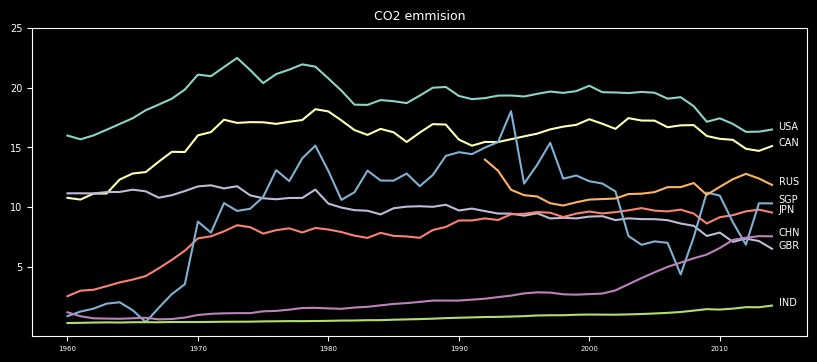

In [17]:
plt.figure(figsize=(10,4))
for country in country_codes:
    df = data2[data2["Country Code"]==country]
    plt.plot(df["Year"].values,df["Value"].values)
    plt.text(2014.5,df[df["Year"]==2014].Value,country, fontsize=7)
plt.xticks(fontsize = 5)
plt.yticks([5,10,15,20,25],fontsize = 7)
plt.title("CO2 emmision",fontsize = 9)
plt.show()

#####  **Inference**

##### <span style = "color:blue">* Across the 8 countries, US emits higher CO2 than the rest. India is emitting the least amount of CO2. </span>
##### <span style = "color:blue">* US is emitting CO2 10 times higher than India. </span>
##### <span style = "color:blue">*  CO2 emission of Singapore is erratic. It was 2nd least CO2 emitting country in 1960 and surpassed 5 countries out of 8 , around 1995 </span>

<a id = "Imp_Exp"></a>
####  4. **Imports and Exports**

In [18]:
filter1 = wdi_data["Country Code"].isin(["USA","CAN","GBR","JPN","SGP","RUS","IND","CHN"])
filter2 = wdi_data["Indicator Name"] == "Exports of goods and services (% of GDP)"
filter3 = wdi_data["Indicator Name"] == "Imports of goods and services (% of GDP)"

exp_data = pd.DataFrame(wdi_data[filter1 & filter2])
imp_data = pd.DataFrame(wdi_data[filter1 & filter3])

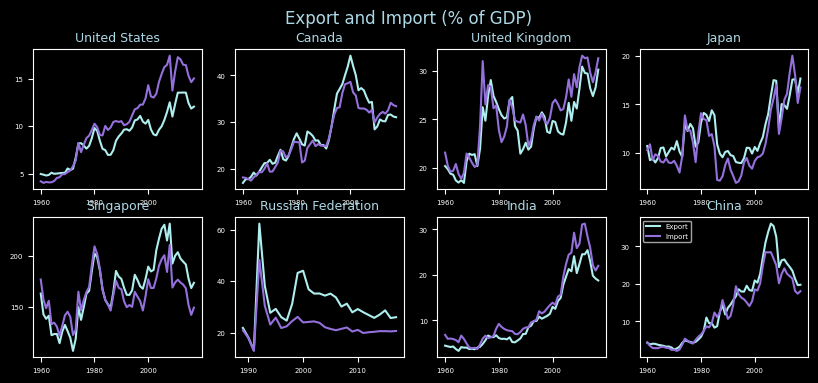

In [19]:
col = 1
fig, axs = plt.subplots(2,4,figsize=(10,4))

for country in country_codes:
    exp = exp_data[exp_data["Country Code"]==country]
    imp = imp_data[imp_data["Country Code"]==country]
    c_name = exp["Country Name"].unique()[0]
    
    plt.subplot(2,4,col)
    
    plt.plot(exp["Year"],exp["Value"],color="paleturquoise",label="Export")
    plt.plot(imp["Year"],imp["Value"],color="mediumpurple",label="Import")
    
    plt.xticks(fontsize = 5)
    plt.yticks(fontsize=5)
    plt.title(c_name,fontsize = 9, color = "lightblue")
    col = col + 1

fig.suptitle("Export and Import (% of GDP)",color="lightblue")
plt.legend(fontsize=5)
plt.show()

<a id = "Inference4"></a>
#####  **Inference**

##### <span style = "color:blue">* Both export and import of a specific country follows the same behaviour - similar highs and lows. </span>
##### <span style = "color:blue">* USA and Russia has considerable deficit between its export and Import. USA has export deficit and Russia has Import deficit </span>

<a id = "CPI"></a>
####  5. **Consumer Price Index**

In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

/tmp/ipykernel_19/1772193665.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [21]:
filter1 = wdi_data["Indicator Name"] == "Consumer price index (2010 = 100)"
filter2 = wdi_data["Year"] == 2015

cpi_data = pd.DataFrame(wdi_data[filter1 & filter2])

In [22]:
merged_df = world.merge(cpi_data, left_on='iso_a3', right_on='Country Code', how='left')

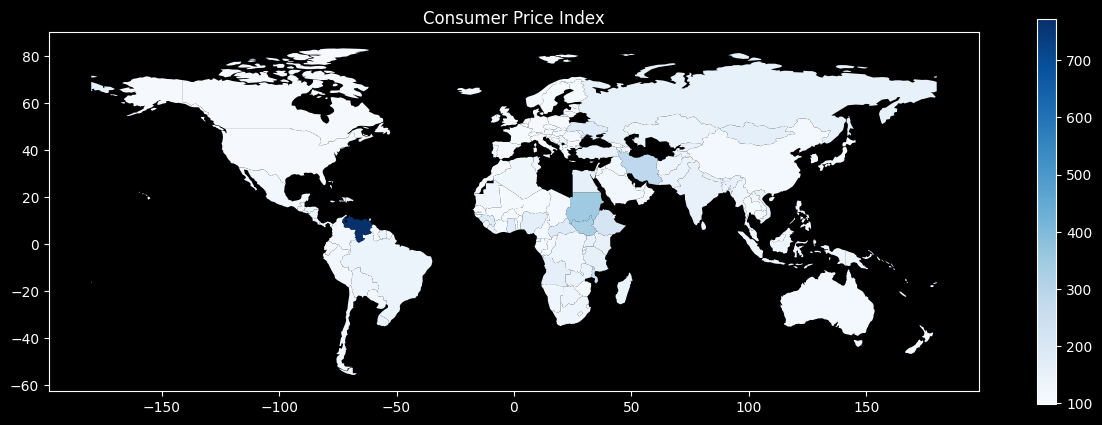

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
merged_df.plot(column='Value', 
             ax=ax,
             legend=True,
             cmap='Blues')
plt.title('Consumer Price Index')
plt.show()

In [24]:
min_cpi = cpi_data["Value"].min()
max_cpi = cpi_data["Value"].max()
cpi_data[cpi_data["Value"] == min_cpi]

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
23593494,Switzerland,CHE,Consumer price index (2010 = 100),FP.CPI.TOTL,2015,98.171765


In [25]:
cpi_data[cpi_data["Value"] == max_cpi]

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
23628672,"Venezuela, RB",VEN,Consumer price index (2010 = 100),FP.CPI.TOTL,2015,772.020086


<a id = "Inference4"></a>
#####  **Inference**

##### <span style = "color:blue">* Switzerland has the lowest CPI. </span>
##### <span style = "color:blue">* Venezuela has the higher CPI also denoted by the dark blue color in the northern coast of South America in the map</span>

In [26]:
for country in country_codes:
    print(country,cpi_data["Value"][cpi_data["Country Code"]==country])

USA 23622276    108.695722
Name: Value, dtype: float64
CAN 23348847    108.672009
Name: Value, dtype: float64
GBR 23620677    110.958017
Name: Value, dtype: float64
JPN 23449584    103.600104
Name: Value, dtype: float64
SGP 23566311    113.219759
Name: Value, dtype: float64
RUS 23550321    151.526256
Name: Value, dtype: float64
IND 23435193    148.602558
Name: Value, dtype: float64
CHN 23358441    114.922125
Name: Value, dtype: float64
